# Insurance Charges Pridiction

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [196]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA - Exploratory Data Analysis

In [197]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [199]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [200]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [201]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

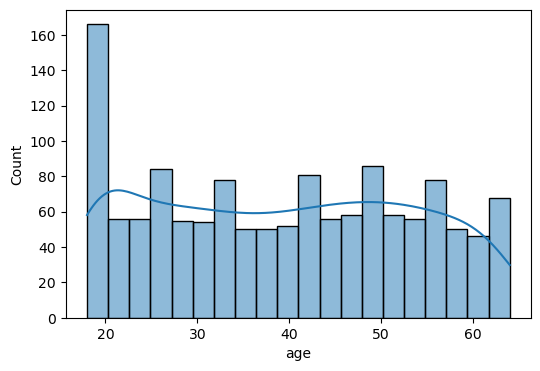

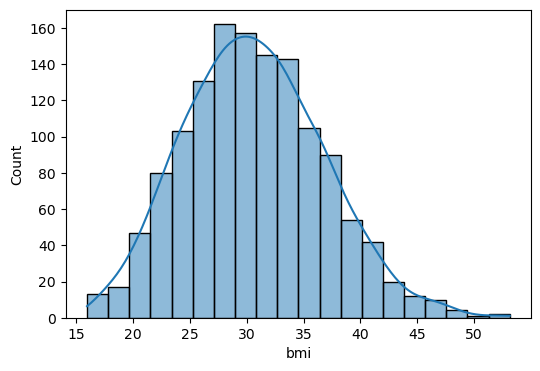

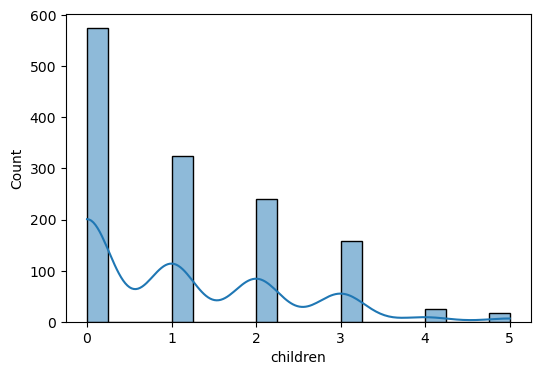

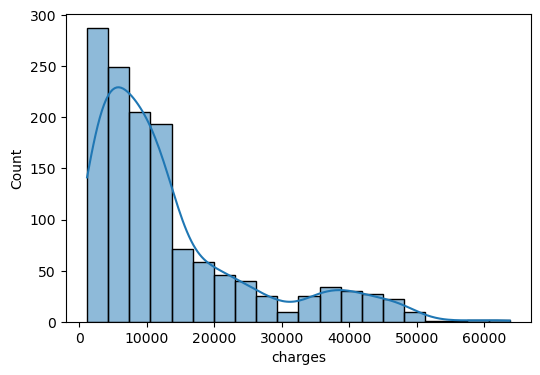

In [202]:
numeric_columns = ['age', 'bmi', 'children', 'charges']

for col in numeric_columns:
    plt.figure(figsize = (6,4))
    sns.histplot(df[col],kde=True,bins=20)
    plt.show()

<Axes: xlabel='children', ylabel='count'>

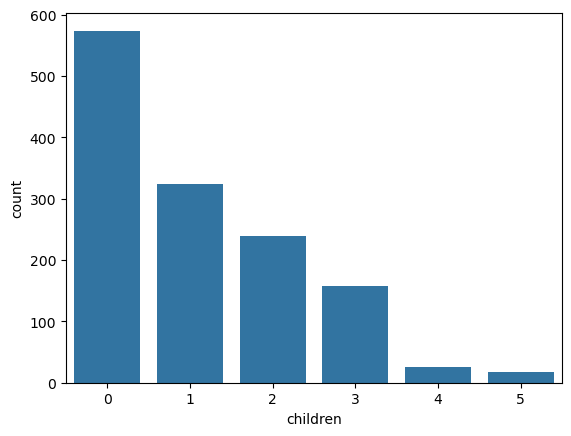

In [203]:
sns.countplot(x = df['children'])

<Axes: xlabel='sex', ylabel='count'>

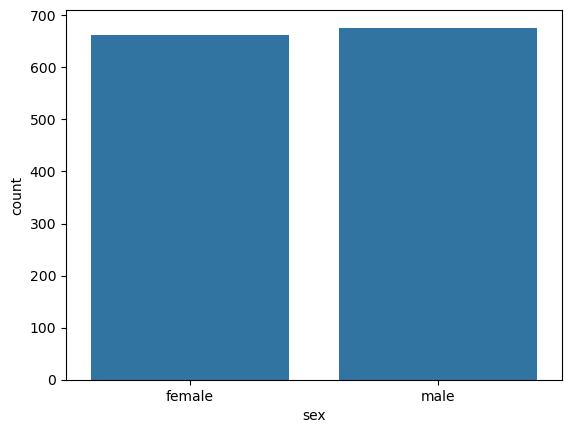

In [204]:
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

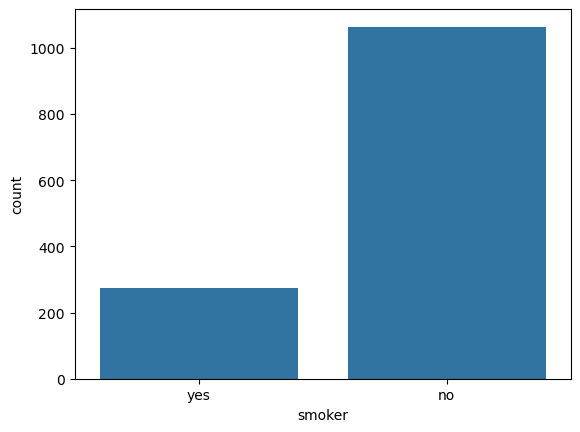

In [205]:
sns.countplot(x = df['smoker'])

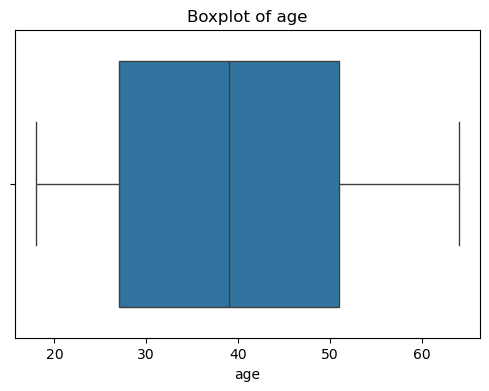

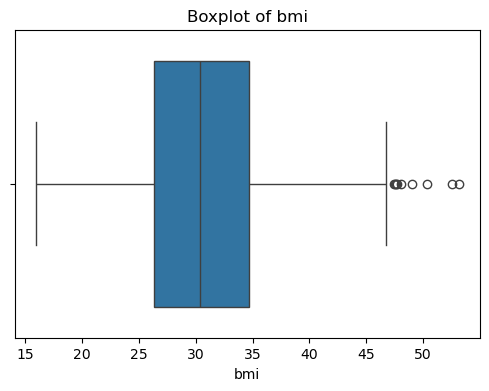

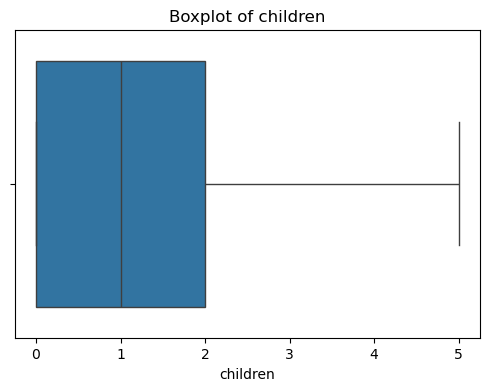

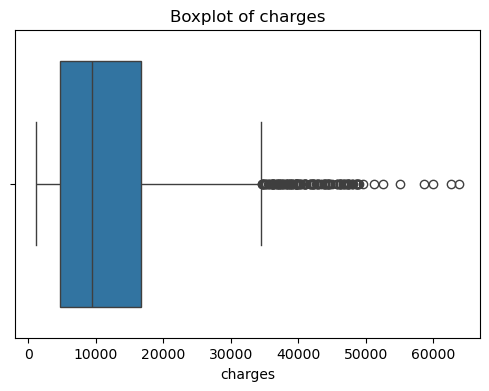

In [206]:
# Detecting Outliers using IQR method

for col in numeric_columns:
    plt.figure(figsize = (6,4))
    sns.boxplot(x = df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

<Axes: >

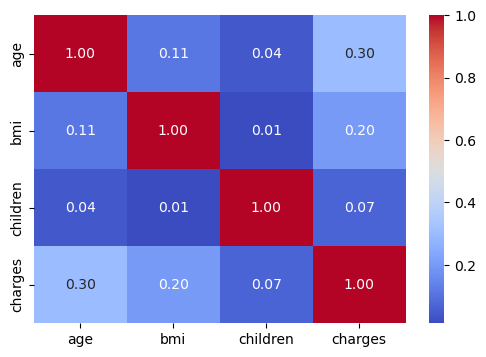

In [207]:
plt.figure(figsize = (6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")

## Data Cleaning and Preprocessing

In [208]:
df_cleaned = df.copy()

In [209]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [210]:
df_cleaned.drop_duplicates(inplace=True)

In [211]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [212]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [213]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [214]:
df_cleaned['sex'] = df_cleaned['sex'].map({'male':0,'female':1}) 

In [215]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [216]:
df_cleaned['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [217]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({'no':0,'yes':1})

In [218]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [219]:
df_cleaned.rename(
    columns={
        'sex' : 'is_female',
        'smoker' : 'is_smoker'
    },inplace=True
)

In [220]:
df_cleaned

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [221]:
df_cleaned['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [222]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['region'], drop_first=False)

In [223]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,False,True,False,False
1334,18,1,31.920,0,0,2205.98080,True,False,False,False
1335,18,1,36.850,0,0,1629.83350,False,False,True,False
1336,21,1,25.800,0,0,2007.94500,False,False,False,True


In [224]:
df_cleaned = df_cleaned.astype(int)
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,0,1
1,18,0,33,1,0,1725,0,0,1,0
2,28,0,33,3,0,4449,0,0,1,0
3,33,0,22,0,0,21984,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,0,1,0,0
1334,18,1,31,0,0,2205,1,0,0,0
1335,18,1,36,0,0,1629,0,0,1,0
1336,21,1,25,0,0,2007,0,0,0,1


## Feature Engineering & Extraction

In [225]:
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=['Underweight', 'Normal', 'Overweight', 'Obesity']
)

In [226]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
0,19,1,27,0,1,16884,0,0,0,1,Overweight
1,18,0,33,1,0,1725,0,0,1,0,Obesity
2,28,0,33,3,0,4449,0,0,1,0,Obesity
3,33,0,22,0,0,21984,0,1,0,0,Normal
4,32,0,28,0,0,3866,0,1,0,0,Overweight
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30,3,0,10600,0,1,0,0,Obesity
1334,18,1,31,0,0,2205,1,0,0,0,Obesity
1335,18,1,36,0,0,1629,0,0,1,0,Obesity
1336,21,1,25,0,0,2007,0,0,0,1,Overweight


In [227]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['bmi_category'], drop_first=False)
df_cleaned = df_cleaned.astype(int)
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obesity
0,19,1,27,0,1,16884,0,0,0,1,0,0,1,0
1,18,0,33,1,0,1725,0,0,1,0,0,0,0,1
2,28,0,33,3,0,4449,0,0,1,0,0,0,0,1
3,33,0,22,0,0,21984,0,1,0,0,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0,0,0,1,0


In [228]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obesity'],
      dtype='object')

In [229]:
from sklearn.preprocessing import StandardScaler

cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [230]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obesity
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,0,1,0,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,0,1,0,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,0,1,0,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,1,0,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,1,0,0,0,0,1,0


In [231]:
from scipy.stats import pearsonr


# list of selected features check against charges
selected_features = [
    'age',
    'bmi',
    'is_smoker',
    'children',
    'region_northeast',
    'region_northwest',
    'region_southeast',
    'region_southwest',
    'bmi_category_Obesity',
    'bmi_category_Overweight',
    'bmi_category_Normal',
    'bmi_category_Underweight'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}

correlations_df = pd.DataFrame(correlations.items(), columns=['Feature', 'Correlation'])
correlations_df.sort_values(by='Correlation', ascending=False, inplace=True)

In [232]:
correlations_df

,Feature,Correlation
2,is_smoker,0.787234
0,age,0.298309
8,bmi_category_Obesity,0.200348
1,bmi,0.196236
6,region_southeast,0.073577
3,children,0.067390
4,region_northeast,0.005946
5,region_northwest,-0.038695
7,region_southwest,-0.043637
11,bmi_category_Underweight,-0.050599


In [233]:
cat_features = [
    'is_smoker','is_female','region_northeast','region_northwest','region_southeast','region_southwest',
    'bmi_category_Obesity','bmi_category_Overweight','bmi_category_Normal','bmi_category_Underweight'
]

In [234]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned['charges_bins'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)

chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bins'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = "Reject Null(Keep Feature)" if p_val < alpha else "Accept Null(Drop Feature)"
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df.sort_values(by='p_value', ascending=True, inplace=True)
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null(Keep Feature)
region_southeast,15.998167,0.001135,Reject Null(Keep Feature)
is_female,10.258784,0.01649,Reject Null(Keep Feature)
bmi_category_Obesity,8.515711,0.036473,Reject Null(Keep Feature)
region_northeast,6.438442,0.092122,Accept Null(Drop Feature)
region_southwest,5.091893,0.165191,Accept Null(Drop Feature)
bmi_category_Overweight,4.25149,0.235557,Accept Null(Drop Feature)
bmi_category_Normal,3.708088,0.29476,Accept Null(Drop Feature)
bmi_category_Underweight,3.37403,0.337471,Accept Null(Drop Feature)
region_northwest,1.13424,0.768815,Accept Null(Drop Feature)


In [235]:
final_df = df_cleaned[[
    'age', 
    'is_smoker', 
    'bmi', 
    'region_southeast', 
    'children', 
    'region_northeast', 
    'is_female', 
    'bmi_category_Obesity'
]]


In [236]:
final_df

,age,is_smoker,bmi,region_southeast,children,region_northeast,is_female,bmi_category_Obesity
0,-1.440418,1,-0.517949,0,-0.909234,0,1,0
1,-1.511647,0,0.462463,1,-0.079442,0,0,1
2,-0.799350,0,0.462463,1,1.580143,0,0,1
3,-0.443201,0,-1.334960,0,-0.909234,0,0,0
4,-0.514431,0,-0.354547,0,-0.909234,0,0,0
...,...,...,...,...,...,...,...,...
1333,0.767704,0,-0.027743,0,1.580143,0,0,1
1334,-1.511647,0,0.135659,0,-0.909234,1,1,1
1335,-1.511647,0,0.952670,1,-0.909234,0,1,1
1336,-1.297958,0,-0.844753,0,-0.909234,0,1,0
